First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width 

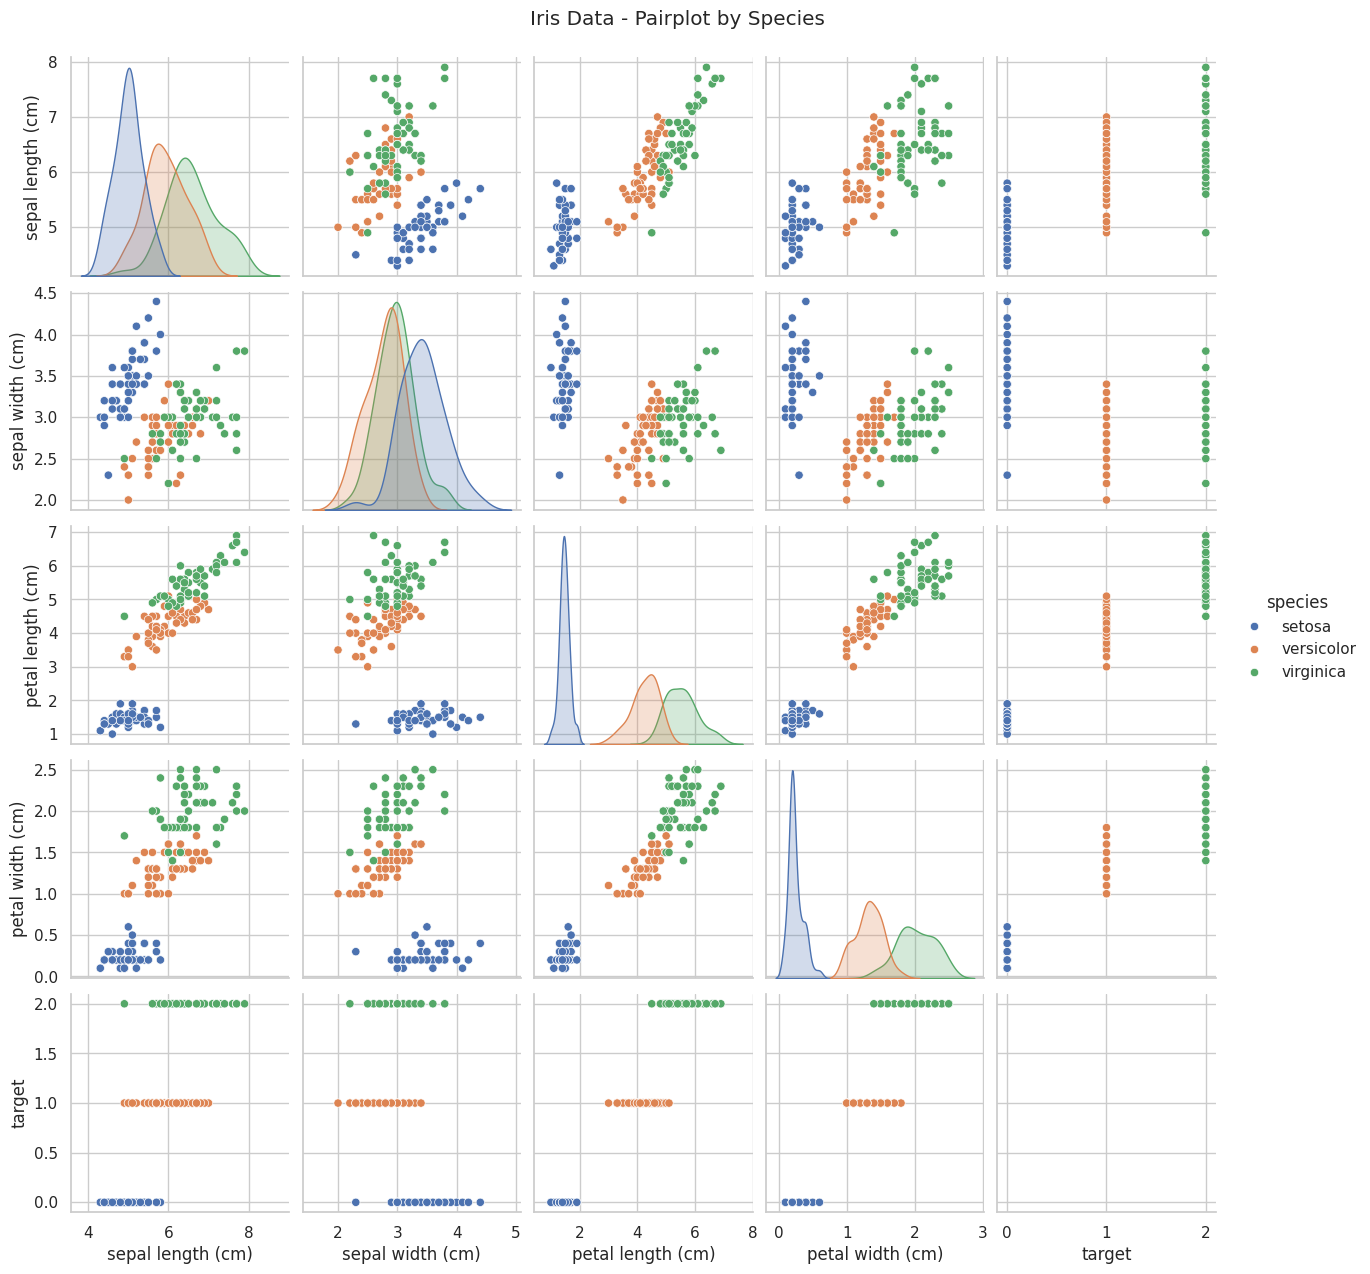

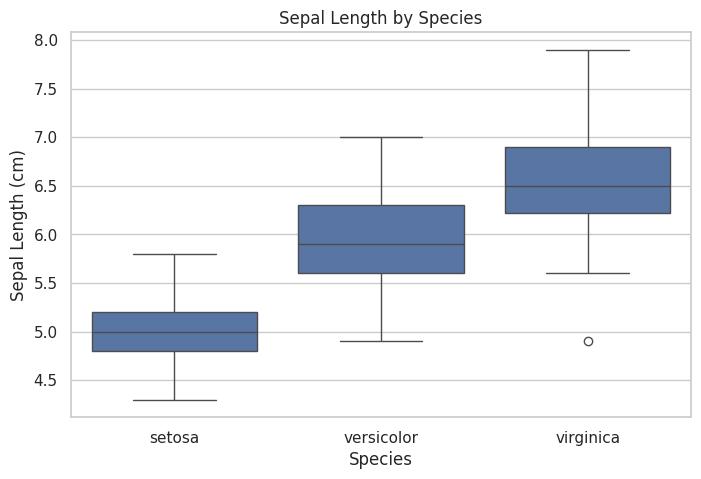

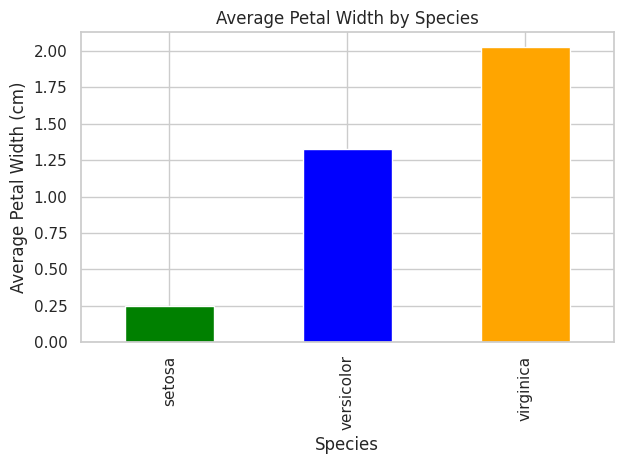


📌 Observations:
- Setosa has generally shorter petals and sepals.
- Versicolor and Virginica show some overlap but differ in width.
- Petal width is a good feature for species separation.


In [1]:
# iris_analysis.py

# 📦 Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# 🧪 Load Dataset with error handling
try:
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['target'] = iris.target
    df['species'] = df['target'].apply(lambda x: iris.target_names[x])
except Exception as e:
    print("Error loading Iris dataset:", e)
    exit()

# 📊 Basic Exploration
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

# 🧹 Check for missing data
if df.isnull().sum().any():
    print("\n⚠️ Missing data found:")
    print(df.isnull().sum())
else:
    print("\n✅ No missing data found.")

# 📈 Visualization 1: Pairplot using Seaborn
sns.set(style="whitegrid")
try:
    sns.pairplot(df, hue='species')
    plt.suptitle('Iris Data - Pairplot by Species', y=1.02)
    plt.show()
except Exception as e:
    print("Error creating pairplot:", e)

# 📊 Visualization 2: Box Plot of Sepal Length by Species
try:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='species', y='sepal length (cm)', data=df)
    plt.title("Sepal Length by Species")
    plt.xlabel("Species")
    plt.ylabel("Sepal Length (cm)")
    plt.show()
except Exception as e:
    print("Error creating boxplot:", e)

# 📊 Visualization 3: Bar chart of average petal width by species
try:
    petal_avg = df.groupby('species')['petal width (cm)'].mean()
    petal_avg.plot(kind='bar', color=['green', 'blue', 'orange'])
    plt.title("Average Petal Width by Species")
    plt.ylabel("Average Petal Width (cm)")
    plt.xlabel("Species")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Error creating bar chart:", e)

# 🔍 Summary / Observations
print("\n📌 Observations:")
print("- Setosa has generally shorter petals and sepals.")
print("- Versicolor and Virginica show some overlap but differ in width.")
print("- Petal width is a good feature for species separation.")

